<a href="https://colab.research.google.com/github/svenzer007/Linear-regression/blob/main/ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
def ComputeCost(m,theta,X,Y):
  J = (1/(2.*m))*(np.matmul(np.transpose(np.matmul(X,theta)-Y),(np.matmul(X,theta)-Y)))
  return J  

In [35]:
def ComputeGradient(m,X,theta,Y):
  grads = (1./m)*(np.matmul(np.transpose(X),(np.matmul(X,theta)-Y))) 
  return grads

In [36]:
def normalize(X):
  for i in range(X.shape[1]):
    a = X[:,i]
    m = np.mean(a)
    s = np.std(a)
    a = (1.*a-m)/s
    X[:,i] = a
  return X

In [37]:
def lr_model(X,Y,theta,learning_rate,iterations=1500):
    cost = []
    m = X.shape[0]
    for i in range(iterations):
      cost.append(ComputeCost(m,theta,X,Y).reshape(1)[0])
      grad = ComputeGradient(m,X,theta,Y)
      theta = theta - learning_rate*grad
    return cost,theta 

In [38]:
#url = 'https://raw.githubusercontent.com/svenzer007/Linear-regression/main/ex1data2.txt?token=AKK3D6H7YDIJLBW4JFVDWN276B552'
df1 = pd.read_csv('/content/sample_data/ex1data2.txt')
df1 = df1.to_numpy()
print(df1.shape)

(46, 3)


In [39]:
Y = df1[:,2].reshape(df1.shape[0],1)
X = df1[:,0:2]
X = X.astype('float64')
X = normalize(X)
X = np.hstack((np.ones((X.shape[0],1)),X))
Y = Y.astype('float64')

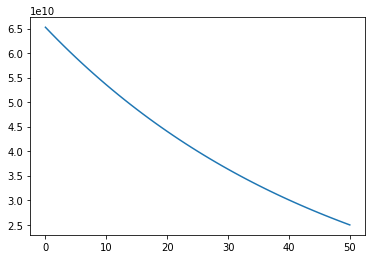

[[339119.36032849]
 [110169.62114884]
 [ -6146.92620156]]


In [40]:
n = X.shape[1]
theta = np.zeros((n,1))
cost, theta = lr_model(X,Y,theta,learning_rate = 0.01)
plt.plot(np.linspace(0,50,51),(np.array(cost)[0:51]))
plt.show()
print(theta)
